In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_gaussian_quantiles
import seaborn as sns
import scipy.stats as stats


In [4]:
# ---------- Defining classifier models --------------
names = {
    "KNN", "SVM", "RBF SVM", "Gaussian Process",
    "Gaussian NB", "Decision Tree", "Random Forest"
}
models = [
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='linear', C=0.02),
    SVC(gamma=2, C=0.1), #no linear SVM
    GaussianProcessClassifier(kernel=0.99*RBF(length_scale=1)), #Gaussian
    GaussianNB(), # naive bayes
    DecisionTreeClassifier(max_depth=6),
    RandomForestClassifier(max_depth=6, n_estimators=10, max_features=2)
]

In [5]:
datasets = [
    make_moons(noise=0.1, random_state=1),
    #creates a moon shape 2 class dataset
    make_classification(
        n_features=2, 
        n_redundant=0,
        n_informative=1, 
        n_clusters_per_class=1
    ),
    # creates a separable classification dataset 
    make_gaussian_quantiles(n_features=2, n_classes=2),
    # creates two gaussian circle dataset
    make_classification(
        n_features=2, 
        n_redundant=0,
        n_informative=
    2)
    # creates a dataset with two class overlap
]

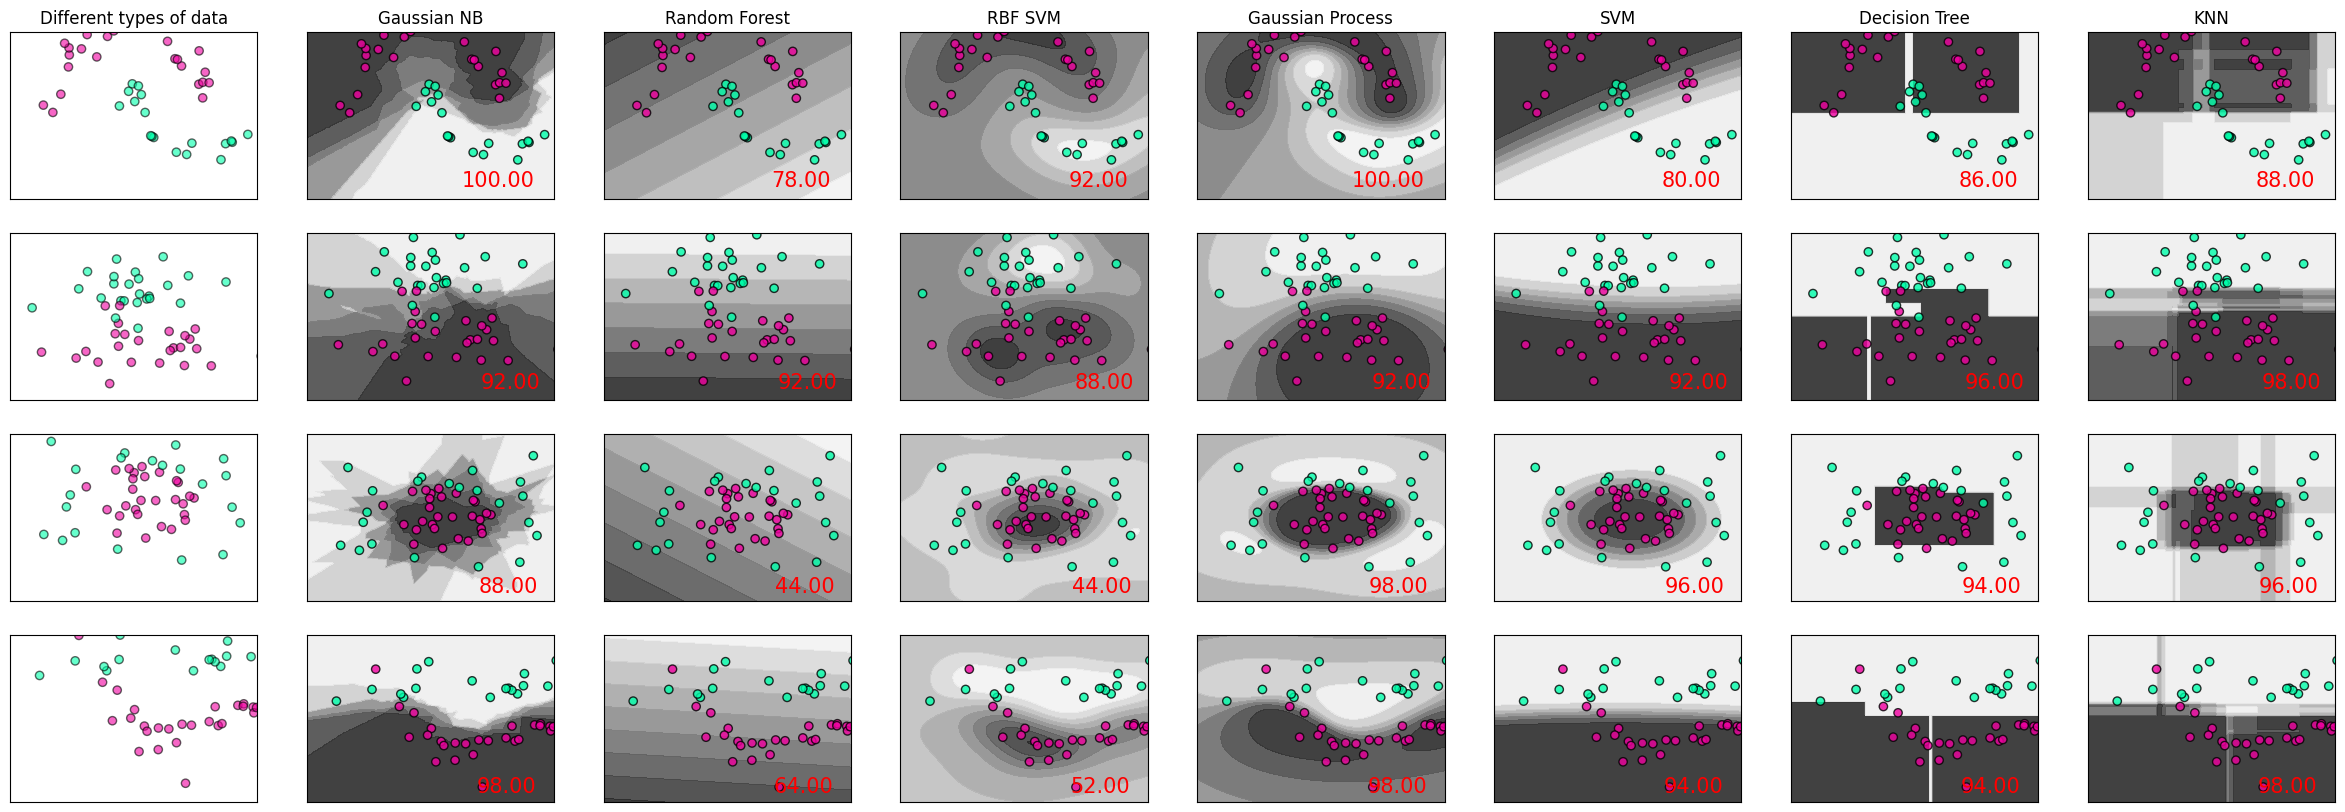

In [7]:
Fig = plt.figure(figsize=(30, 10))
count = 1
for idxx, data in enumerate(datasets):
    X, y = data
    #pre-processing
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size=0.5, random_state=1601
    )
    #minimum and maximum range for creating plot mesh
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() - 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() - 0.5
    x1x1, x2x2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.01),
        np.arange(x2_min, x2_max, 0.02),
    ) 
    #using the scikit-learn plotting of desicion boundary
    cm = plt.cm.gray
    cm_bright = ListedColormap(['#F000A0', '#00FFAA']) 
    ax = plt.subplot(len(datasets), len(models) + 1, count) 
    if idxx == 0:
        ax.set_title("Different types of data")
    # plotting test samples
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, 
        alpha=0.6, edgecolors='k'
    )
    ax.set_xlim(x1x1.min(), x1x1.max()) 
    ax.set_ylim(x2x2.min(), x1x1.max())
    ax.set_xticks(()) 
    ax.set_yticks(())
    count += 1 # Counting column

    for name, classifier in zip(names, models):
        ax = plt.subplot(len(datasets), len(models) + 1, count) 
        classifier.fit(X_train, y_train) # Training
        acc = classifier.score(X_test, y_test) *100 # Accuracy 
        # Decision boundary plotting 
        # Point in the mesh [x1_min, x1_max]x[x2_min, x2_max]
        if hasattr(classifier, "decision_function"): 
            hh = classifier.decision_function(
                np.c_[x1x1.ravel(), x2x2.ravel()]
            )
        else:
            hh = classifier.predict_proba(
                np.c_[x1x1.ravel(), x2x2.ravel()]
            )[:,1] 
        # Put the result into a color plot
        hh = hh.reshape(x1x1.shape)
        ax.contourf(x1x1, x2x2, hh,cmap=cm, alpha=.8) 
        # Ploting test samples
        ax.scatter(
            X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
            edgecolors='k', alpha=0.8
        )
        ax.set_xlim(x1x1.min(), x1x1.max())
        ax.set_ylim(x2x2.min(), x2x2.max())
        ax.set_xticks(()) 
        ax.set_yticks(()) 
        if idxx == 0:
            ax.set_title(name)
        ax.text(
            x1x1.max() - .3, x2x2.min() + .3, 
            ('%.2f' % acc).lstrip('0'),
            size=15, color= 'red', horizontalalignment='right'
        )
        count += 1 # counting within each row 

plt.savefig('./results/classifier.png', bbox_inches='tight')

